In [10]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt, cm as cm
from scipy import io, misc
import random
import math
from itertools import product

# Programming Exercise 3: Multi-class Classification and Neural Networks

For this exercise, you will use logistic regression and neural networks to recognize handwritten digits (from 0 to 9). Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. This exercise will show you how the methods you’ve learned can be used for this classification task.

In [11]:
filename = 'data/ex3data1.mat'
data = io.loadmat(filename)
x, y = data['X'], data['y']
X = np.insert(x,0,1,axis=1)

In [16]:
def getDatumImg(row):
    """
    Function that is handed a single np array with shape 1x400,
    crates an image object from it, and returns it
    """
    width, height = 20, 20
    square = row[1:].reshape(width,height)
    return square.T
    
def displayData(indices_to_display = None):
    """
    Function that picks 100 random rows from X, creates a 20x20 image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    width, height = 20, 20
    nrows, ncols = 10, 10
    if not indices_to_display:
        indices_to_display = random.sample(range(X.shape[0]), nrows*ncols)
        
    big_picture = np.zeros((height*nrows,width*ncols))
    
    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = getDatumImg(X[idx])
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(6,6))
    img = misc.toimage( big_picture )
    plt.imshow(img,cmap = cm.Greys_r)
    plt.show()

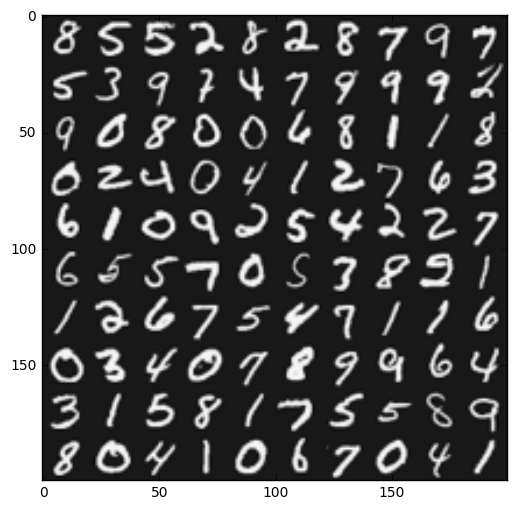

In [17]:
displayData()